In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('csv/dataset_sms_spam _v1.csv')

In [3]:
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
Teks     1143 non-null object
label    1143 non-null int64
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


In [4]:
df.label.value_counts()

0    569
1    335
2    239
Name: label, dtype: int64

In [5]:
#data text jadi matriks
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vect = CountVectorizer()
vect.fit(df.Teks)

X = vect.transform(df.Teks)

In [17]:
X

<1143x4951 sparse matrix of type '<class 'numpy.int64'>'
	with 19191 stored elements in Compressed Sparse Row format>

> <br> 1143 kalimat
> <br> 4951 token (kata yang unik)

In [13]:
X1 = pd.DataFrame(X)

In [15]:
X1.head()

,0
0,"(0, 232)\t1\n (0, 318)\t1\n (0, 319)\t1\n ..."
1,"(0, 338)\t1\n (0, 439)\t2\n (0, 474)\t1\n ..."
2,"(0, 53)\t1\n (0, 55)\t1\n (0, 244)\t2\n (..."
3,"(0, 53)\t1\n (0, 55)\t1\n (0, 244)\t1\n (..."
4,"(0, 439)\t1\n (0, 578)\t1\n (0, 579)\t1\n ..."


In [26]:
#split train test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, df.label)

In [22]:
X_train

<857x4951 sparse matrix of type '<class 'numpy.int64'>'
	with 14319 stored elements in Compressed Sparse Row format>

In [23]:
X_test

<286x4951 sparse matrix of type '<class 'numpy.int64'>'
	with 4872 stored elements in Compressed Sparse Row format>

In [35]:
#train machine learning model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
#lakukan prediksi

Y_pred = model.predict(X_test)

In [38]:
#evaluasi model

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

print("confusion matrix :")
print(confusion_matrix(Y_pred, Y_test))
print("accuracy score :")
print(accuracy_score(Y_pred, Y_test))
print("classification report :")
print(classification_report(Y_pred, Y_test))


confusion matrix :
[[128   1   1]
 [  1  65   6]
 [  6   9  69]]
accuracy score :
0.916083916083916
classification report :
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       130
           1       0.87      0.90      0.88        72
           2       0.91      0.82      0.86        84

    accuracy                           0.92       286
   macro avg       0.91      0.90      0.90       286
weighted avg       0.92      0.92      0.92       286



In [74]:
#masukan data baru

sms_baru = ["halo apa kabar ?",
           "pinjaman tanpa jaminan hanya disini",
           "promo paket flash 1 GB hanya Rp. 10000",
           "pinjaman pinjaman pinjaman pinjaman pinjaman",
           "injam promo promo promo",
           "Hanya Rp1 Anda sudah bisa berlangganan Minipack Channel IndiHome favorit di Aplikasi Bukalapak, aktivasi sekarang juga disini http://nmc.sg/kJ6gWrz",
           "Plg Yth, dptkan KartuKredit Citi dg KTP & Slip Gaji.Khusus karyawan & punya KK/pinjaman Bank lain. S&K http://tsel.me/dj_tac Balas SMS ini (gratis) dg ketik: KK",
           "kami dari KSP SB menawarkan pinjaman dana berbasis online bunga cuma 2% info chat via WA: 082191396355"]

In [76]:
#langkah 1 : ubah dari teks ->  matriks

sms_baru_vec = vect.transform(sms_baru)

#langkah 2: masukan dalam model

hasil = model.predict(sms_baru_vec)

print(hasil)

[0 1 2 1 2 2 2 1]


In [89]:
from sklearn.cluster import MiniBatchKMeans

cls = MiniBatchKMeans(n_clusters=3, random_state=0)
cls.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [90]:
# predict cluster labels for new dataset
cls.predict(X)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [91]:
from sklearn.decomposition import PCA

# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

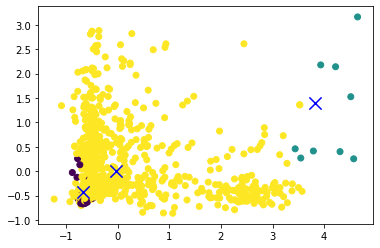

In [92]:
import matplotlib.pyplot as plt
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')